In [129]:
import pandas as pd
import numpy as np
import seaborn as sns

In [40]:
df = sns.load_dataset('titanic')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [42]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [45]:
print("missing values:\n", df.isnull().sum())

missing values:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [46]:
print(df['class'].unique())

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']


In [49]:
class_mapping = {'First':1, 'Second':2, 'Third':3}
df['class_num'] = df['class'].map(class_mapping)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
 15  class_num    891 non-null    category
dtypes: bool(2), category(3), float64(2), int64(4), object(5)
memory usage: 81.7+ KB


In [50]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [52]:
df.shape

(891, 16)

In [55]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
class_num         int64
dtype: object

In [54]:
df['class_num'] = pd.to_numeric(df['class_num'], errors = 'coerce')

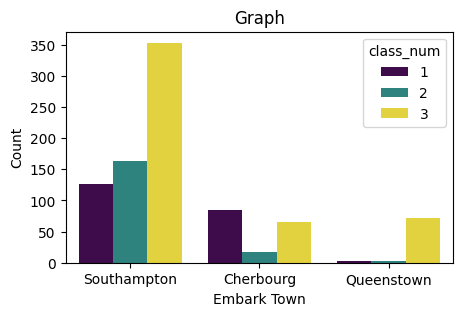

In [71]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 3))
sns.countplot(data=df, x='embark_town', hue='class_num', palette='viridis')
plt.title('Graph')
plt.xlabel('Embark Town')
plt.ylabel('Count')
plt.show()

In [62]:
df = df.drop('deck', axis = 1)

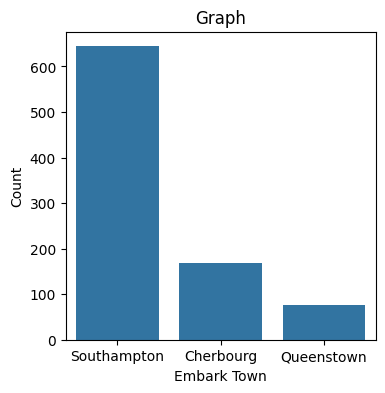

In [76]:
plt.figure(figsize=(4, 2))
sns.countplot(data=df, x='embark_town')
plt.title('Graph')
plt.xlabel('Embark Town')
plt.ylabel('Count')
plt.show()

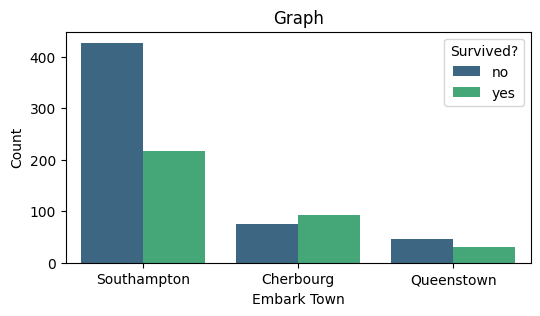

In [77]:
plt.figure(figsize=(6, 3))
sns.countplot(data=df, x='embark_town', hue='alive', palette='viridis')
plt.title('Graph')
plt.xlabel('Embark Town')
plt.ylabel('Count')
plt.legend(title='Survived?')
plt.show()

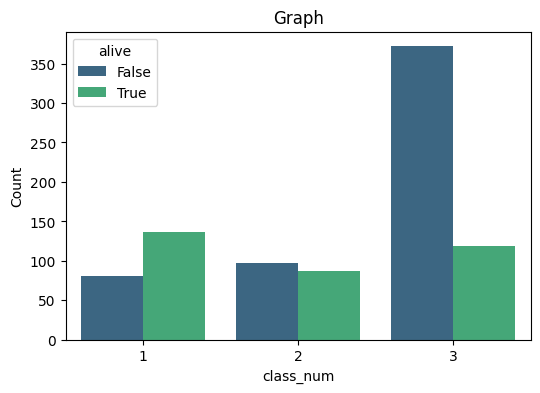

In [87]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='class_num', hue='alive', palette='viridis')
plt.title('Graph')
plt.xlabel('class_num')
plt.ylabel('Count')
plt.show()

In [82]:
df['alive'] = pd.get_dummies(df['alive'], drop_first = True)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    bool    
 13  alone        891 non-null    bool    
 14  class_num    891 non-null    int64   
dtypes: bool(3), category(1), float64(2), int64(5), object(4)
memory usage: 80.3+ KB


In [104]:
dead = df[df['alive']==0]

In [105]:
alives = df[df['alive']==1]

In [95]:
dead.info()

<class 'pandas.core.frame.DataFrame'>
Index: 549 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     549 non-null    int64   
 1   pclass       549 non-null    int64   
 2   sex          549 non-null    object  
 3   age          424 non-null    float64 
 4   sibsp        549 non-null    int64   
 5   parch        549 non-null    int64   
 6   fare         549 non-null    float64 
 7   embarked     549 non-null    object  
 8   class        549 non-null    category
 9   who          549 non-null    object  
 10  adult_male   549 non-null    bool    
 11  embark_town  549 non-null    object  
 12  alive        549 non-null    bool    
 13  alone        549 non-null    bool    
 14  class_num    549 non-null    int64   
dtypes: bool(3), category(1), float64(2), int64(5), object(4)
memory usage: 53.7+ KB


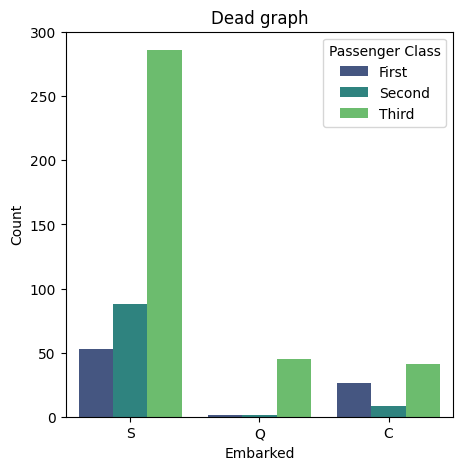

In [96]:
plt.figure(figsize=(5, 5))
sns.countplot(data=dead, x='embarked', hue='class', palette='viridis')
plt.title('Dead graph')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.legend(title='Passenger Class')
plt.show()

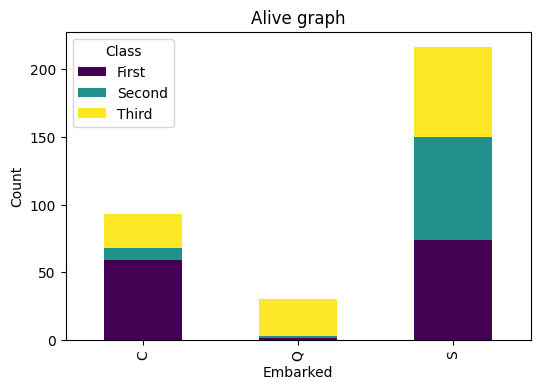

In [127]:
death_counts = alives.groupby(['embarked', 'class'], observed=True).size().unstack()
death_counts.plot(kind='bar', stacked=True, figsize=(6, 4), colormap = 'viridis')
plt.title('Alive graph')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.legend(title='Class')
plt.show()